In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib
import seaborn as sns

In [4]:
df_train = pd.read_csv("Consumer_Complaints_train.csv")
df_test = pd.read_csv("Consumer_Complaints_test_share.csv")

In [6]:
cols_to_drop = [
    'Complaint ID',
    'Company public response',
    'Sub-product',
    'Sub-issue',
    'Tags',
    'Consumer consent provided?'
]

df_train.drop(columns=[col for col in cols_to_drop if col in df_train.columns], inplace=True)
df_test.drop(columns=[col for col in cols_to_drop if col in df_test.columns], inplace=True)


In [68]:
df_train.head(10)

,Date received,Product,Issue,Consumer complaint narrative,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,2014-05-15,Credit card,Billing statement,NA,Wells Fargo & Company,MI,48342,Web,2014-05-16,Closed with explanation,Yes,No
1,2014-09-18,Bank account or service,"Making/receiving payments, sending money",NA,Santander Bank US,PA,18042,Referral,2014-09-24,Closed,Yes,No
2,2014-03-13,Credit reporting,Incorrect information on credit report,NA,Equifax,CA,92427,Referral,2014-04-03,Closed with non-monetary relief,Yes,No
3,2015-07-17,Credit card,Billing statement,"My credit card statement from US Bank, XXXX. X...",U.S. Bancorp,GA,305XX,Web,2015-07-17,Closed with monetary relief,Yes,No
4,2014-11-20,Credit card,Transaction issue,NA,Bank of America,MA,02127,Web,2014-11-28,Closed with explanation,Yes,No
5,2014-06-26,Mortgage,"Loan modification,collection,foreclosure",NA,Bank of America,WI,54313,Referral,2014-07-01,Closed with explanation,Yes,No
6,2012-09-28,Mortgage,"Loan servicing, payments, escrow account",NA,Ocwen,FL,33168,Referral,2012-10-01,Closed with explanation,Yes,No
7,2015-05-06,Mortgage,"Loan modification,collection,foreclosure",I have a mortgage with Quicken Loans. From XXX...,Quicken Loans,GA,300XX,Web,2015-05-06,Closed with explanation,Yes,Yes
8,2013-02-25,Credit card,Credit card protection / Debt protection,NA,Discover,OH,45640,Web,2013-02-26,Closed with monetary relief,Yes,No
9,2016-03-30,Bank account or service,Deposits and withdrawals,I put my settlement check in to bank of americ...,Bank of America,TX,787XX,Web,2016-04-01,Closed with explanation,Yes,No


In [66]:
df_test.head(10)

,Date received,Product,Issue,Consumer complaint narrative,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?
0,2014-01-18,Bank account or service,Deposits and withdrawals,NA,Bank of America,CA,95691,Web,2014-01-17,Closed with explanation,Yes
1,2016-03-31,Debt collection,Cont'd attempts collect debt not owed,NA,"National Credit Adjusters, LLC",FL,32086,Web,2016-03-31,Closed with explanation,Yes
2,2012-03-08,Mortgage,"Loan servicing, payments, escrow account",NA,Wells Fargo & Company,CA,94618,Web,2012-03-09,Closed without relief,Yes
3,2016-01-07,Credit reporting,Unable to get credit report/credit score,NA,"TransUnion Intermediate Holdings, Inc.",FL,33584,Postal mail,2016-01-12,Closed with non-monetary relief,Yes
4,2013-08-23,Mortgage,"Loan modification,collection,foreclosure",NA,Bank of America,FL,33543,Web,2013-08-23,Closed with explanation,Yes
5,2013-12-12,Credit reporting,Incorrect information on credit report,NA,Equifax,DC,20018,Web,2013-12-12,Closed with explanation,Yes
6,2015-03-16,Debt collection,Cont'd attempts collect debt not owed,NA,Real Time Resolutions,TX,75249,Web,2015-03-16,Closed with explanation,Yes
7,2016-04-29,Credit reporting,Credit monitoring or identity protection,NA,Experian,CA,91791,Referral,2016-04-29,Closed with non-monetary relief,Yes
8,2014-12-17,Debt collection,Communication tactics,NA,"MRS BPO, L.L.C.",WA,99403,Referral,2014-12-18,Closed with explanation,Yes
9,2013-03-19,Credit card,Customer service / Customer relations,NA,Citibank,IL,60640,Web,2013-03-20,Closed with monetary relief,Yes


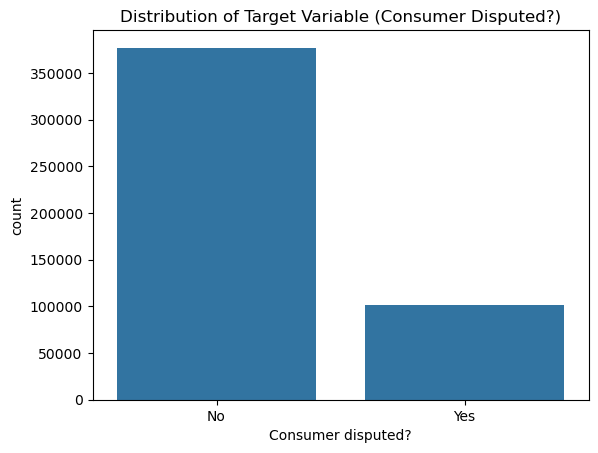

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df_train, x='Consumer disputed?')
plt.title("Distribution of Target Variable (Consumer Disputed?)")
plt.show()


<Axes: ylabel='Product'>

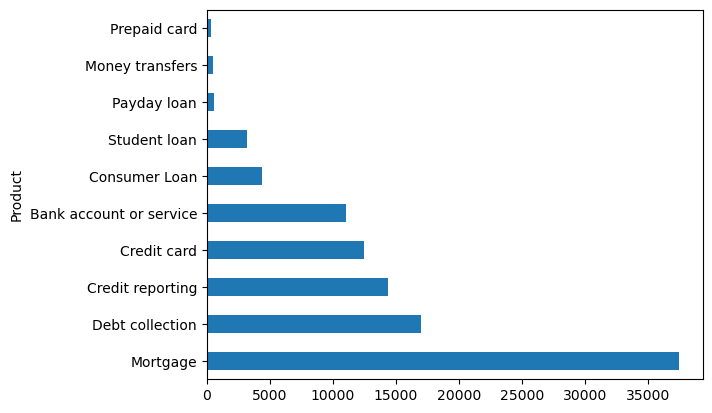

In [54]:
top=df_train[df_train['Consumer disputed?']=='Yes']['Product'].value_counts().head(10)
top.plot(kind='barh')

<Axes: xlabel='Timely response?', ylabel='count'>

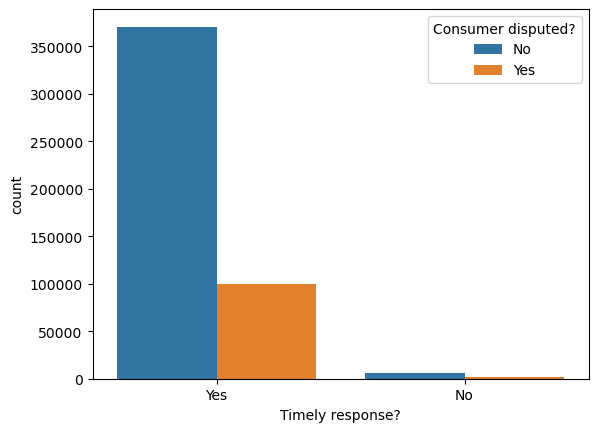

In [58]:
sns.countplot(data=df_train, x='Timely response?', hue='Consumer disputed?')


In [76]:

df_train['ZIP code'].fillna('00000', inplace=True)
df_test['ZIP code'].fillna('00000', inplace=True)

df_train['State'].fillna(df_train['State'].mode()[0], inplace=True)
df_test['State'].fillna(df_test['State'].mode()[0], inplace=True)

df_train['Consumer complaint narrative'].fillna("NA", inplace=True)
df_test['Consumer complaint narrative'].fillna("NA", inplace=True)

In [72]:
df_train.head(10)

,Date received,Product,Issue,Consumer complaint narrative,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,2014-05-15,Credit card,Billing statement,NA,Wells Fargo & Company,MI,48342,Web,2014-05-16,Closed with explanation,Yes,No
1,2014-09-18,Bank account or service,"Making/receiving payments, sending money",NA,Santander Bank US,PA,18042,Referral,2014-09-24,Closed,Yes,No
2,2014-03-13,Credit reporting,Incorrect information on credit report,NA,Equifax,CA,92427,Referral,2014-04-03,Closed with non-monetary relief,Yes,No
3,2015-07-17,Credit card,Billing statement,"My credit card statement from US Bank, XXXX. X...",U.S. Bancorp,GA,305XX,Web,2015-07-17,Closed with monetary relief,Yes,No
4,2014-11-20,Credit card,Transaction issue,NA,Bank of America,MA,02127,Web,2014-11-28,Closed with explanation,Yes,No
5,2014-06-26,Mortgage,"Loan modification,collection,foreclosure",NA,Bank of America,WI,54313,Referral,2014-07-01,Closed with explanation,Yes,No
6,2012-09-28,Mortgage,"Loan servicing, payments, escrow account",NA,Ocwen,FL,33168,Referral,2012-10-01,Closed with explanation,Yes,No
7,2015-05-06,Mortgage,"Loan modification,collection,foreclosure",I have a mortgage with Quicken Loans. From XXX...,Quicken Loans,GA,300XX,Web,2015-05-06,Closed with explanation,Yes,Yes
8,2013-02-25,Credit card,Credit card protection / Debt protection,NA,Discover,OH,45640,Web,2013-02-26,Closed with monetary relief,Yes,No
9,2016-03-30,Bank account or service,Deposits and withdrawals,I put my settlement check in to bank of americ...,Bank of America,TX,787XX,Web,2016-04-01,Closed with explanation,Yes,No


In [74]:
df_test.head(10)

,Date received,Product,Issue,Consumer complaint narrative,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?
0,2014-01-18,Bank account or service,Deposits and withdrawals,NA,Bank of America,CA,95691,Web,2014-01-17,Closed with explanation,Yes
1,2016-03-31,Debt collection,Cont'd attempts collect debt not owed,NA,"National Credit Adjusters, LLC",FL,32086,Web,2016-03-31,Closed with explanation,Yes
2,2012-03-08,Mortgage,"Loan servicing, payments, escrow account",NA,Wells Fargo & Company,CA,94618,Web,2012-03-09,Closed without relief,Yes
3,2016-01-07,Credit reporting,Unable to get credit report/credit score,NA,"TransUnion Intermediate Holdings, Inc.",FL,33584,Postal mail,2016-01-12,Closed with non-monetary relief,Yes
4,2013-08-23,Mortgage,"Loan modification,collection,foreclosure",NA,Bank of America,FL,33543,Web,2013-08-23,Closed with explanation,Yes
5,2013-12-12,Credit reporting,Incorrect information on credit report,NA,Equifax,DC,20018,Web,2013-12-12,Closed with explanation,Yes
6,2015-03-16,Debt collection,Cont'd attempts collect debt not owed,NA,Real Time Resolutions,TX,75249,Web,2015-03-16,Closed with explanation,Yes
7,2016-04-29,Credit reporting,Credit monitoring or identity protection,NA,Experian,CA,91791,Referral,2016-04-29,Closed with non-monetary relief,Yes
8,2014-12-17,Debt collection,Communication tactics,NA,"MRS BPO, L.L.C.",WA,99403,Referral,2014-12-18,Closed with explanation,Yes
9,2013-03-19,Credit card,Customer service / Customer relations,NA,Citibank,IL,60640,Web,2013-03-20,Closed with monetary relief,Yes


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizers
tfidf_narrative = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_issue = TfidfVectorizer(max_features=100, stop_words='english')


combined_narrative = pd.concat([df_train['Consumer complaint narrative'], df_test['Consumer complaint narrative']])
combined_issue = pd.concat([df_train['Issue'], df_test['Issue']])


narrative_vectors = tfidf_narrative.fit_transform(combined_narrative)
issue_vectors = tfidf_issue.fit_transform(combined_issue)


n_train = df_train.shape[0]
X_narr_train = narrative_vectors[:n_train]
X_narr_test = narrative_vectors[n_train:]

X_issue_train = issue_vectors[:n_train]
X_issue_test = issue_vectors[n_train:]

In [14]:
from sklearn.preprocessing import OneHotEncoder

# List of columns to encode
cat_cols = ['Product', 'Company', 'State', 'ZIP code', 
            'Company response to consumer', 'Timely response?', 'Submitted via']

# Combine train and test to ensure consistent encoding
combined_cats = pd.concat([df_train[cat_cols], df_test[cat_cols]])

# OneHotEncoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cats = encoder.fit_transform(combined_cats)

X_cat_train = encoded_cats[:df_train.shape[0]]
X_cat_test = encoded_cats[df_train.shape[0]:]


In [16]:
from scipy.sparse import hstack

# Stack them all side-by-side
X_train_final = hstack([X_narr_train, X_issue_train, X_cat_train])
X_test_final = hstack([X_narr_test, X_issue_test, X_cat_test])

# Target variable
y_train_final = df_train['Consumer disputed?'].map({'Yes': 1, 'No': 0})

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


y = df_train['Consumer disputed?'].map({'Yes': 1, 'No': 0})  # Convert to 0 and 1

# Split features and target
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_final, y, test_size=0.2, random_state=42
)

In [20]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_split, y_train_split)

y_pred = log_reg.predict(X_val_split)
print("Accuracy:", accuracy_score(y_val_split, y_pred))
print(classification_report(y_val_split, y_pred))


Accuracy: 0.5985995715106861
              precision    recall  f1-score   support

           0       0.84      0.60      0.70     75501
           1       0.28      0.59      0.38     20184

    accuracy                           0.60     95685
   macro avg       0.56      0.59      0.54     95685
weighted avg       0.73      0.60      0.64     95685



In [22]:
y_pred

array([0, 1, 1, ..., 0, 0, 1])